In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from mlxtend.feature_selection import sequential_feature_selector as sfs
pd.set_option('display.max_columns', None)

### 1. Data Understanding

a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)?  

b. Calculate five-point summary for numerical variables

c. Summarize observations for categorical variables – no. of categories, % observations in each category.

d. Check for defects in the data such as missing values, null, outliers, etc. 

In [39]:
df = pd.read_csv('cancer_reg.csv', encoding = 'Latin1')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [40]:
df.shape

(3047, 34)

In [41]:
df.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04
avgDeathsPerYear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04
TARGET_deathRate,3047.0,178.664063,27.751511,59.700000,161.200000,178.100000,195.200000,3.628000e+02
incidenceRate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03
medIncome,3047.0,47063.281917,12040.090836,22640.000000,38882.500000,45207.000000,52492.000000,1.256350e+05
popEst2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07
povertyPercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01
studyPerCap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03
MedianAge,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02
MedianAgeMale,3047.0,39.570725,5.226017,22.400000,36.350000,39.600000,42.500000,6.470000e+01


In [43]:
# dropping column geography
df.drop('Geography', axis=1, inplace= True)

In [44]:
# df['binnedInc_sp']=df['binnedInc'].map(lambda x:str(x).split(',')[1])    # my own creation not impt

In [45]:
df.binnedInc.unique()

array(['(61494.5, 125635]', '(48021.6, 51046.4]', '(42724.4, 45201]',
       '(51046.4, 54545.6]', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(54545.6, 61494.5]', '(34218.1, 37413.8]', '[22640, 34218.1]',
       '(45201, 48021.6]'], dtype=object)

In [6]:
s = '(61494.5, 125635]'
float(s.split(',')[0].strip('('))

61494.5

In [47]:
def clean(x):
    return float(x.split(',')[0].replace('(','').replace('[',''))
    
df['lowerbinnedInc'] = df.binnedInc.apply(clean)

In [48]:
def clean1(x):
    return float(x.split(',')[1].replace(']','').replace(' ',''))
    
df['upperbinnedInc'] = df.binnedInc.apply(clean1)

In [49]:
df.drop('binnedInc', axis=1, inplace=True)

In [50]:
df.isnull().sum()*100/df.shape[0]

avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
TARGET_deathRate            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctSomeCol18_24            74.991795
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.988513
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.986872
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
PctPublicCoverageAlone      0.000000
PctWhite                    0.000000
P

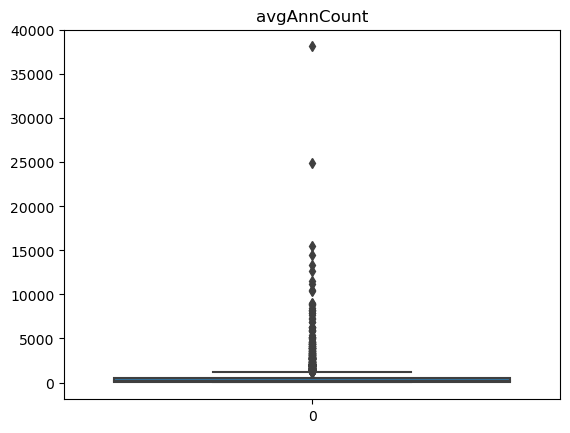

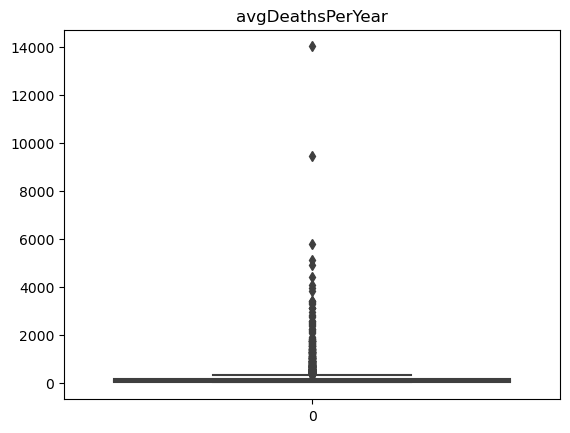

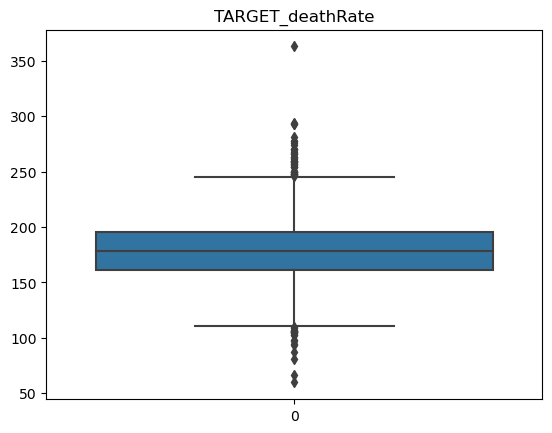

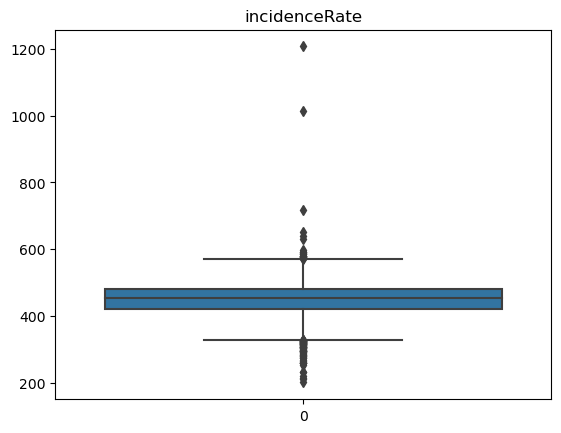

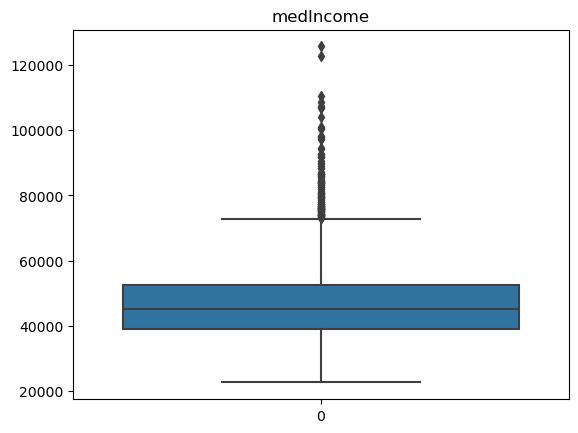

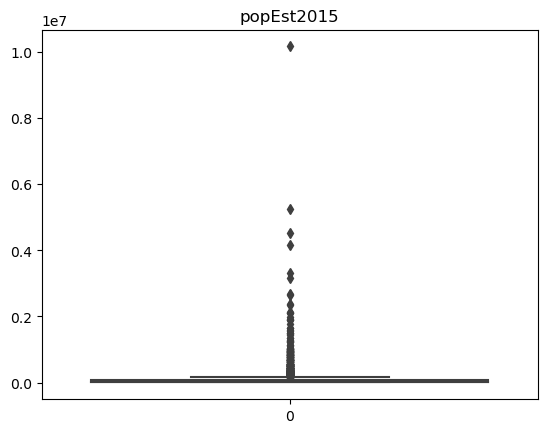

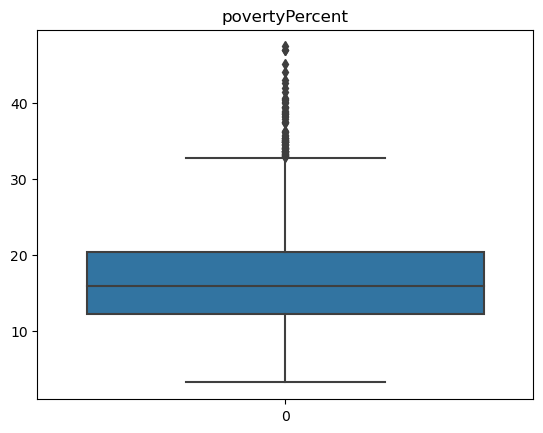

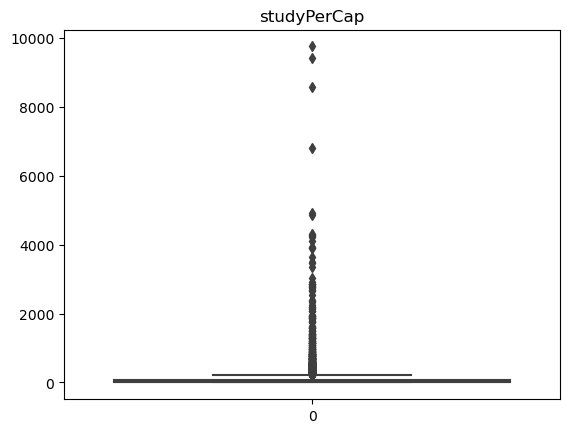

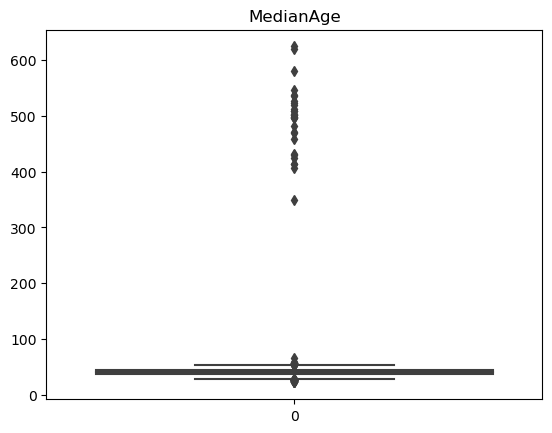

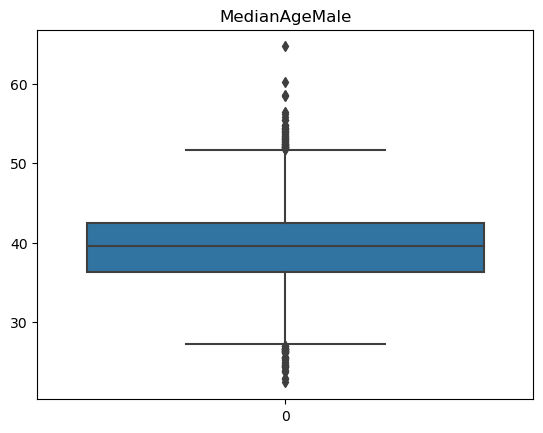

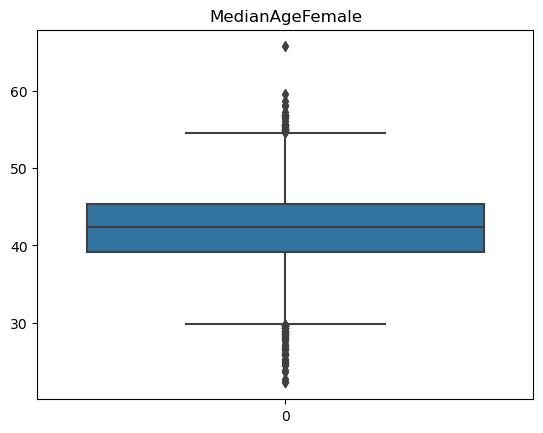

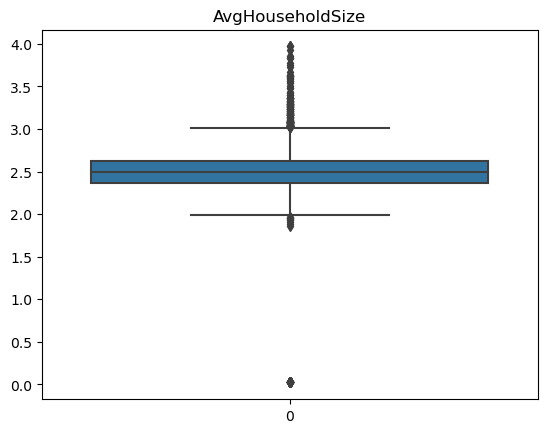

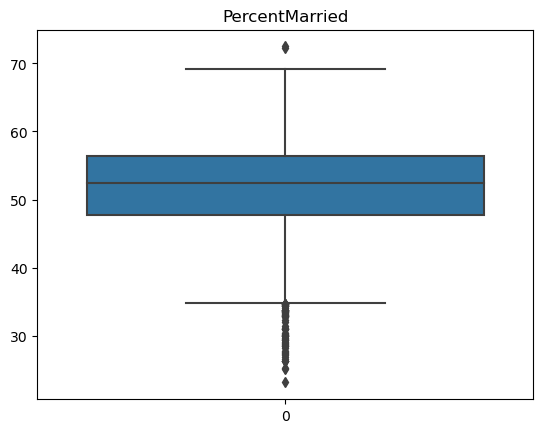

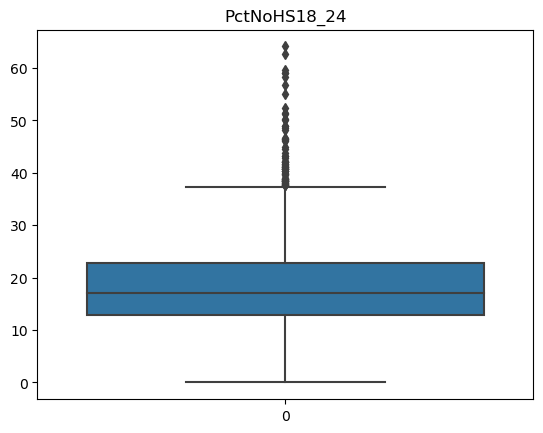

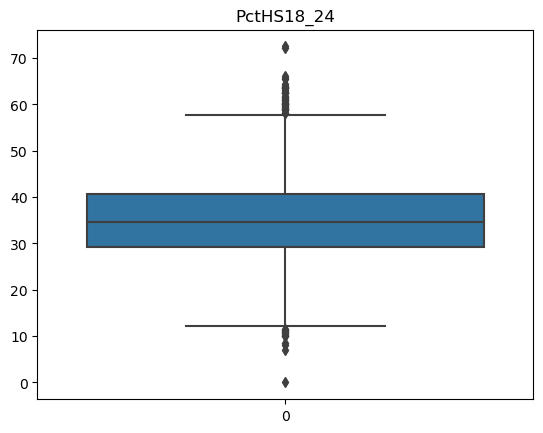

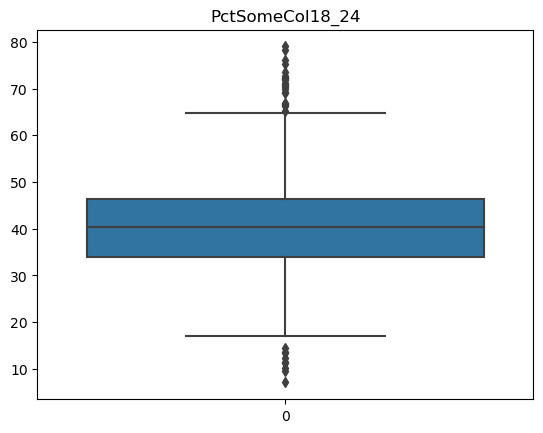

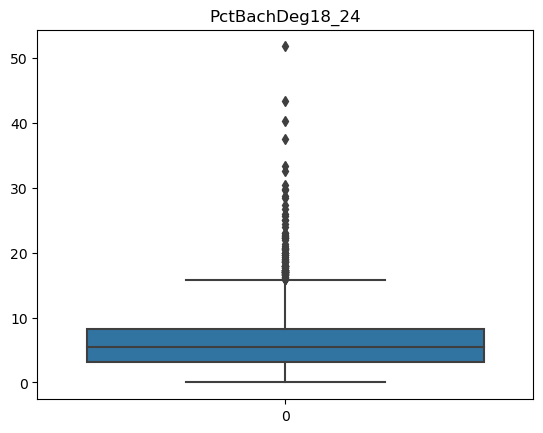

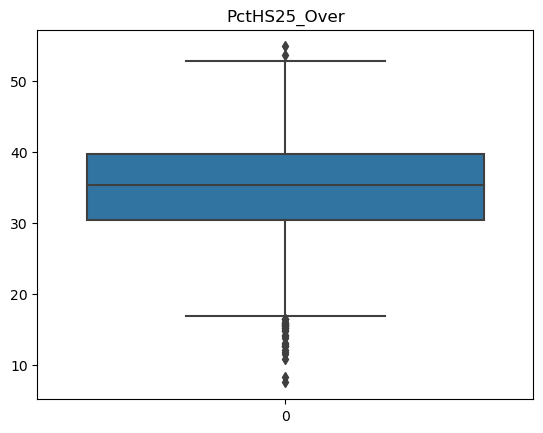

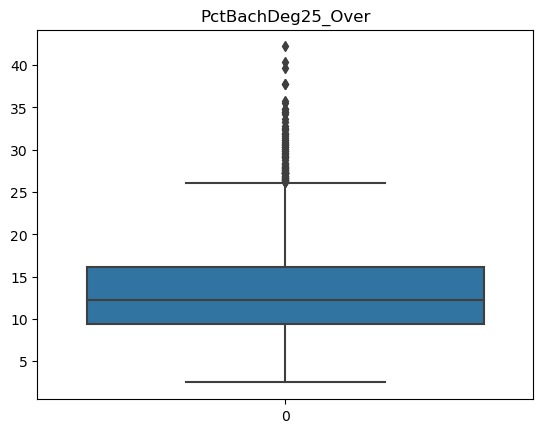

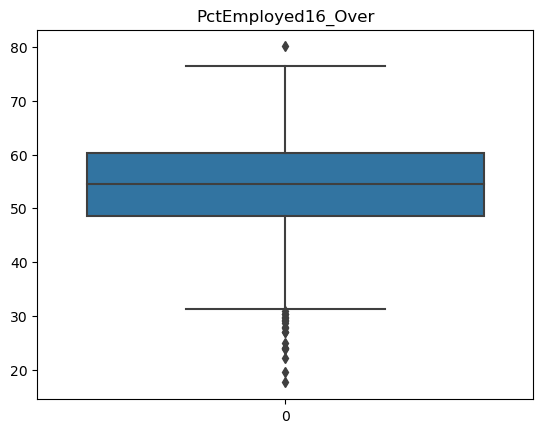

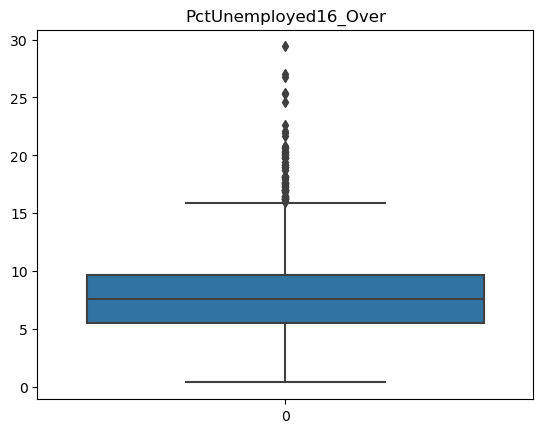

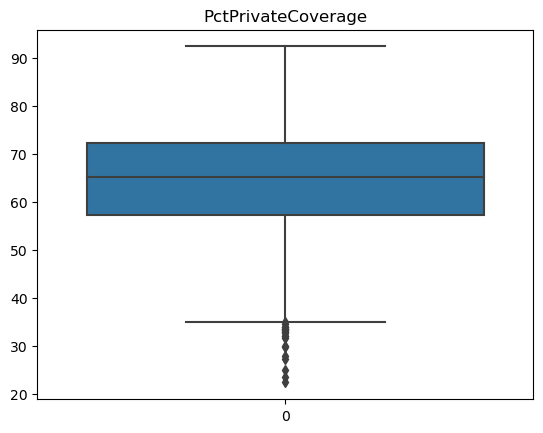

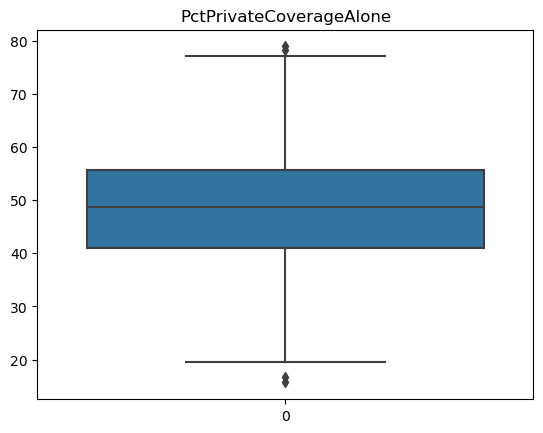

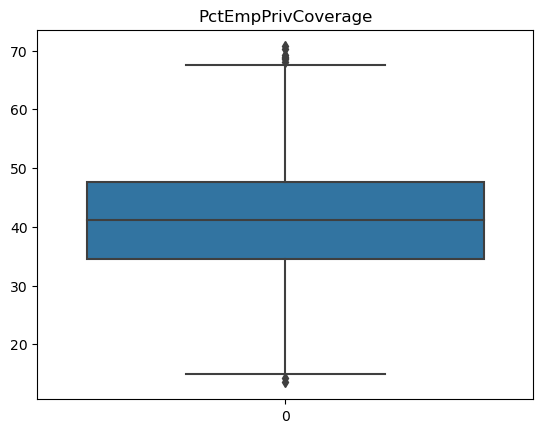

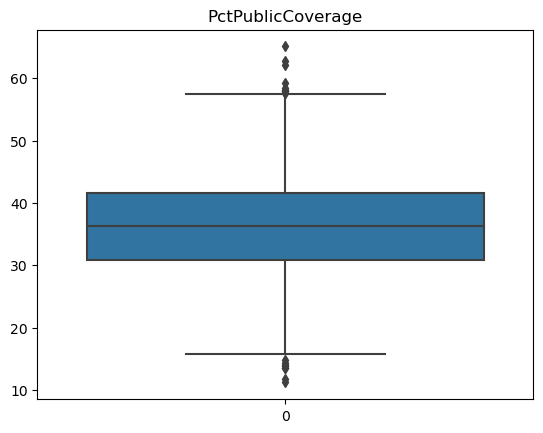

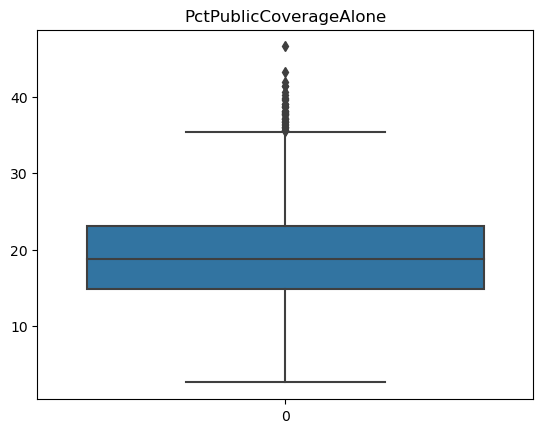

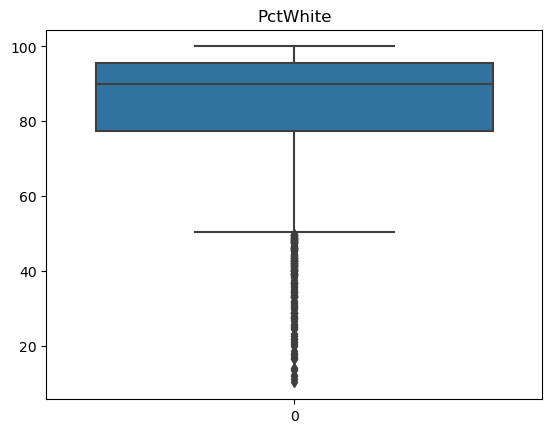

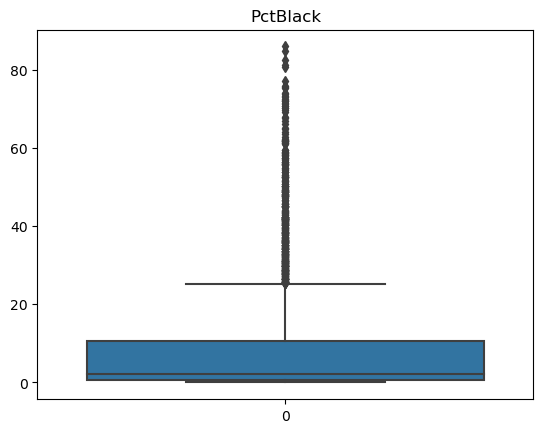

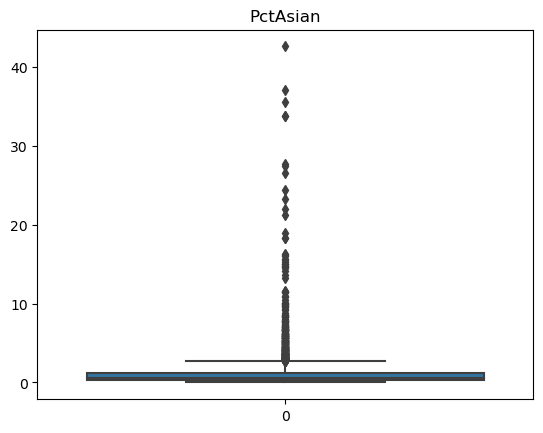

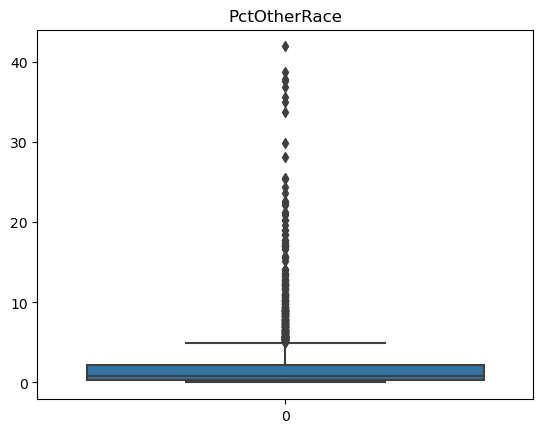

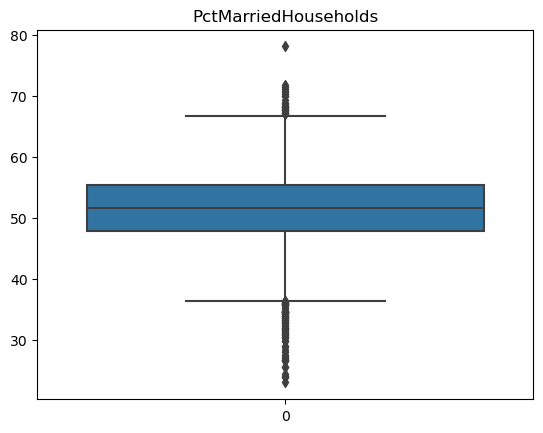

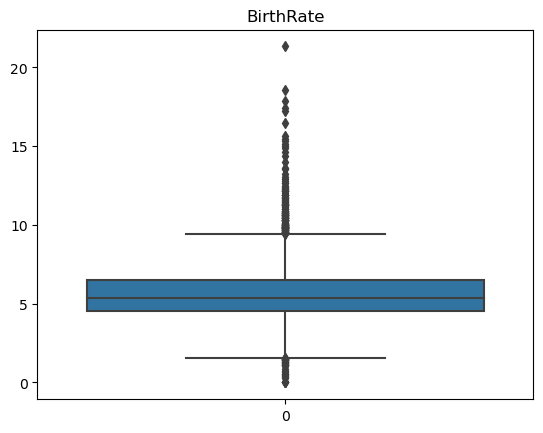

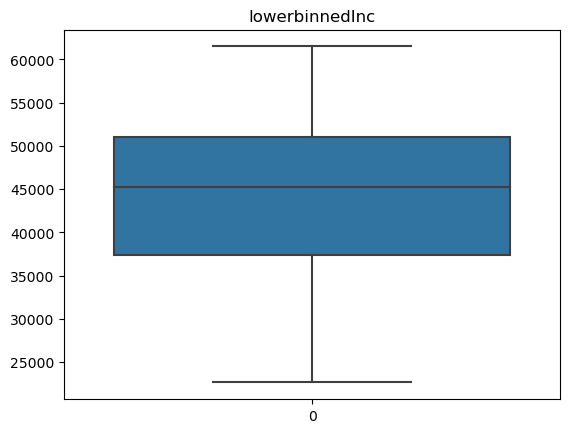

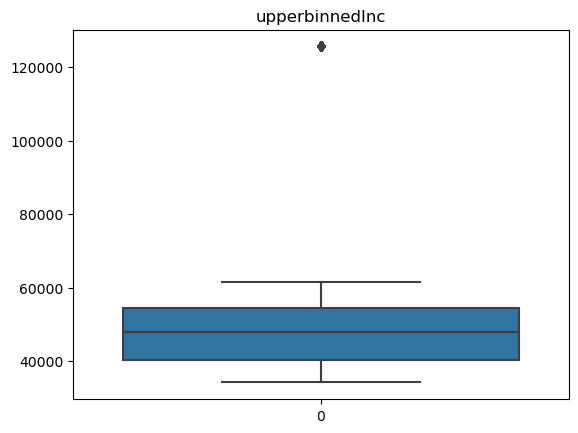

In [51]:
for i in df.select_dtypes(exclude= object).columns:
    sns.boxplot(df[i])
    plt.title(label=i)
    plt.show()

In [52]:
df.drop('PctSomeCol18_24', axis=1, inplace=True)

In [53]:
df.PctEmployed16_Over.fillna(df.PctEmployed16_Over.median(), inplace=True)
df.PctPrivateCoverageAlone.fillna(df.PctPrivateCoverageAlone.median(), inplace=True)

In [54]:
### Dataframe---> outliers
### Dataframe---> no outliers     (df_out)

In [55]:
df_out=df.copy()              # without outliers
df_out_x = df_out.drop(['TARGET_deathRate'], axis=1)
df_out_y = df_out['TARGET_deathRate']

In [56]:
q1=df_out_x.quantile(0.25)
q3=df_out_x.quantile(0.75)
IQR=q3-q1
upper=q3 + 1.5*IQR
lower=q1 - 1.5*IQR

In [57]:
df_out_x = df_out_x[~((df_out_x < lower) | (df_out_x > upper)).any(axis=1)]

In [58]:
ind = df_out_x.index

In [59]:
df_out_y = df_out_y.iloc[ind]

In [60]:
df_out = pd.concat([df_out_x, df_out_y], axis=1)

In [61]:
df_x = df.drop('TARGET_deathRate', axis=1)
df_y = df['TARGET_deathRate']
sc = StandardScaler()
df_x = pd.DataFrame(sc.fit_transform(df_x), columns=df_x.columns)

In [62]:
df_out_x = df_out.drop('TARGET_deathRate', axis=1)
df_out_y = df_out['TARGET_deathRate']
sc = StandardScaler()
df_out = pd.DataFrame(sc.fit_transform(df_out), columns=df_out.columns)

### 2. Data Preparation

a. Fix the defects found above and do appropriate treatment if any.

b. Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? 

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take?  

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? 
 

In [63]:
x_outlier = sm.add_constant(df_x)          # with outlier
y_outlier = df_y
xtrain, xtest, ytrain, ytest = train_test_split(x_outlier, y_outlier, test_size=0.3, random_state=100)

In [64]:
model_outlier=sm.OLS(ytrain, xtrain).fit()
model_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     72.26
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          3.44e-310
Time:                        13:04:33   Log-Likelihood:                -9292.0
No. Observations:                2132   AIC:                         1.865e+04
Df Residuals:                    2099   BIC:                         1.884e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     178.7248      0.413    432.267      0.000     177.914     179.536
avgAnnCount                -5.7925      1.263     -4.588      0.000      -8.268      -3.317
avgDeathsPerYear           10.4143      2.325      4.478      0.000       5.854      14.975
incidenceRate              10.3464      0.462     22.419      0.000       9.441      11.252
medIncome                   2.8195      1.615      1.746      0.081      -0.347       5.986
popEst2015                 -5.2264      2.151     -2.429      0.015      -9.446      -1.007
povertyPercent             -1.2874      1.392     -0.925      0.355      -4.016       1.442
studyPerCap                 0.1976      0.411      0.481      0.631      -0.608       1.004
MedianAge                  -0.5571      0.423     -1.318      0.187      -1.386       0.272
MedianAgeMale              -0.9156      1.292     -0.709      0.478      -3.448       1.617
MedianAgeFemale            -2.3399      1.381     -1.694      0.090      -5.048       0.368
AvgHouseholdSize            0.6205      0.520      1.194      0.233      -0.399       1.640
PercentMarried              7.2290      1.338      5.402      0.000       4.605       9.853
PctNoHS18_24               -0.7895      0.542     -1.457      0.145      -1.852       0.273
PctHS18_24                  1.7048      0.527      3.233      0.001       0.671       2.739
PctBachDeg18_24            -0.5602      0.584     -0.960      0.337      -1.705       0.585
PctHS25_Over                3.2106      0.801      4.006      0.000       1.639       4.782
PctBachDeg25_Over          -6.3649      0.978     -6.505      0.000      -8.284      -4.446
PctEmployed16_Over         -3.6528      0.949     -3.848      0.000      -5.514      -1.791
PctUnemployed16_Over        0.9724      0.682      1.426      0.154      -0.365       2.310
PctPrivateCoverage         -3.1720      1.775     -1.787      0.074      -6.653       0.309
PctPrivateCoverageAlone     0.5952      0.917      0.649      0.516      -1.204       2.394
PctEmpPrivCoverage          1.8976      1.161      1.635      0.102      -0.379       4.174
PctPublicCoverage          -3.3162      2.080     -1.595      0.111      -7.395       0.762
PctPublicCoverageAlone      3.7160      2.024      1.836      0.066      -0.253       7.685
PctWhite                   -3.6190      1.122     -3.224      0.001      -5.820      -1.418
PctBlack                   -2.5615      0.969     -2.643      0.008      -4.462      -0.661
PctAsian                   -0.9114      0.569     -1.602      0.109      -2.027       0.204
PctOtherRace               -3.1136      0.500     -6.229      0.000      -4.094      -2.133
PctMarriedHouseholds       -7.8701      1.238     -6.358      0.000     -10.298      -5.443
BirthRate                  -1.4704      0.450  

### 3. Model Building

a. Fit a base model and observe the overall R- Squared of the model. Please comment on whether it is good or not. 

b. Check for multi-collinearity and treat the same.

c. How would you improve the model? Write clearly the changes that you will make before refitting the model. Fit the final model.   


In [65]:
x = sm.add_constant(df_out_x)     # without outlier
y = df_out_y
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=100)

In [66]:
model=sm.OLS(ytrain, xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     58.79
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          1.64e-186
Time:                        13:04:35   Log-Likelihood:                -3365.8
No. Observations:                 837   AIC:                             6798.
Df Residuals:                     804   BIC:                             6954.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     153.0205     33.988      4.502      0.000      86.305     219.736
avgAnnCount                -0.6151      0.032    -19.165      0.000      -0.678      -0.552
avgDeathsPerYear            1.5010      0.067     22.436      0.000       1.370       1.632
incidenceRate               0.2895      0.014     20.288      0.000       0.262       0.318
medIncome                   0.0003      0.000      0.592      0.554      -0.001       0.001
popEst2015               1.107e-05      0.000      0.109      0.913      -0.000       0.000
povertyPercent             -0.1762      0.320     -0.552      0.581      -0.803       0.451
studyPerCap                 0.0262      0.013      2.031      0.043       0.001       0.051
MedianAge                   3.9670      1.729      2.295      0.022       0.574       7.360
MedianAgeMale              -1.9973      0.973     -2.052      0.041      -3.908      -0.087
MedianAgeFemale            -2.6788      0.901     -2.972      0.003      -4.448      -0.909
AvgHouseholdSize           -3.2498      6.115     -0.531      0.595     -15.253       8.753
PercentMarried              0.0645      0.297      0.217      0.828      -0.518       0.647
PctNoHS18_24               -0.0236      0.089     -0.266      0.790      -0.198       0.151
PctHS18_24                  0.1929      0.073      2.648      0.008       0.050       0.336
PctBachDeg18_24             0.2083      0.199      1.047      0.295      -0.182       0.599
PctHS25_Over                0.1959      0.145      1.348      0.178      -0.089       0.481
PctBachDeg25_Over          -0.4928      0.267     -1.849      0.065      -1.016       0.030
PctEmployed16_Over         -0.5171      0.157     -3.292      0.001      -0.825      -0.209
PctUnemployed16_Over       -0.0461      0.284     -0.162      0.871      -0.603       0.510
PctPrivateCoverage         -0.9358      0.239     -3.917      0.000      -1.405      -0.467
PctPrivateCoverageAlone     0.2405      0.144      1.666      0.096      -0.043       0.524
PctEmpPrivCoverage          0.2505      0.181      1.385      0.167      -0.105       0.606
PctPublicCoverage          -0.0528      0.355     -0.149      0.882      -0.750       0.645
PctPublicCoverageAlone     -0.0368      0.441     -0.084      0.933      -0.902       0.828
PctWhite                    0.0151      0.108      0.141      0.888      -0.196       0.226
PctBlack                    0.1441      0.137      1.054      0.292      -0.124       0.413
PctAsian                    0.4500      1.349      0.333      0.739      -2.199       3.098
PctOtherRace               -1.1605      0.531     -2.186      0.029      -2.202      -0.119
PctMarriedHouseholds       -0.2239      0.319     -0.702      0.483      -0.850       0.402
BirthRate                  -0.7292      0.344  

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,5099.605590
MedianAge,208.598455
avgAnnCount,103.719997
avgDeathsPerYear,72.764128
MedianAgeMale,68.204503
MedianAgeFemale,58.040421
medIncome,50.724130
upperbinnedInc,38.281347
popEst2015,35.603052


In [69]:
xtrain=xtrain.drop('MedianAge', axis=1)     
# drop the column with highest vif value and keep iterating till atleast 5 columns are dropped 
# drop columns one by one and keep checking
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,5081.614866
avgAnnCount,103.509612
avgDeathsPerYear,72.396099
medIncome,50.557787
upperbinnedInc,38.241435
popEst2015,35.576243
PctPublicCoverage,21.364384
PctPublicCoverageAlone,20.222263
PctPrivateCoverage,17.849312


In [70]:
xtrain=xtrain.drop('avgAnnCount', axis=1)
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,4989.843337
medIncome,50.339926
upperbinnedInc,38.036099
popEst2015,26.325753
avgDeathsPerYear,23.657530
PctPublicCoverage,21.179790
PctPublicCoverageAlone,20.052425
PctPrivateCoverage,17.829213
lowerbinnedInc,15.684747


In [71]:
xtrain=xtrain.drop('medIncome', axis=1)
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,4935.206460
popEst2015,26.278204
avgDeathsPerYear,23.640374
PctPublicCoverage,21.102993
PctPublicCoverageAlone,19.955322
PctPrivateCoverage,17.530466
lowerbinnedInc,14.867069
upperbinnedInc,12.947622
MedianAgeFemale,10.055354


In [72]:
xtrain=xtrain.drop('popEst2015', axis=1)
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,4934.609843
PctPublicCoverage,20.938125
PctPublicCoverageAlone,19.868073
PctPrivateCoverage,17.515261
lowerbinnedInc,14.825606
upperbinnedInc,12.825754
MedianAgeFemale,9.674195
povertyPercent,8.724797
MedianAgeMale,8.541407


In [73]:
xtrain=xtrain.drop('PctPublicCoverage', axis=1)
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,4857.482866
lowerbinnedInc,14.810653
PctPrivateCoverage,14.242334
upperbinnedInc,12.758888
MedianAgeFemale,9.257913
povertyPercent,8.664168
MedianAgeMale,8.245242
PercentMarried,7.603335
PctEmpPrivCoverage,7.077233


In [74]:
xtrain=xtrain.drop('lowerbinnedInc', axis=1)
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,4754.388848
PctPrivateCoverage,14.216235
MedianAgeFemale,9.253238
MedianAgeMale,8.245030
povertyPercent,7.602273
PercentMarried,7.574304
PctEmpPrivCoverage,7.075571
PctMarriedHouseholds,6.986634
upperbinnedInc,5.580172


In [76]:
xtrain=xtrain.drop('PctPrivateCoverage', axis=1)
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,4100.671469
MedianAgeFemale,9.020594
MedianAgeMale,8.198052
PercentMarried,7.558288
povertyPercent,7.358405
PctMarriedHouseholds,6.922805
PctEmpPrivCoverage,5.698106
upperbinnedInc,5.540760
PctEmployed16_Over,4.621166


In [77]:
xtrain=xtrain.drop('MedianAgeFemale', axis=1)
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,3408.928932
PercentMarried,7.458747
povertyPercent,7.069965
PctMarriedHouseholds,6.820611
PctEmpPrivCoverage,5.594941
upperbinnedInc,5.527043
PctEmployed16_Over,4.465929
PctPrivateCoverageAlone,4.053261
PctBachDeg25_Over,4.017494


In [78]:
xtrain=xtrain.drop('PercentMarried', axis=1)
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,3223.689183
povertyPercent,7.007349
upperbinnedInc,5.490994
PctEmpPrivCoverage,5.253354
PctPrivateCoverageAlone,4.049871
PctBachDeg25_Over,3.932998
PctPublicCoverageAlone,3.816537
PctEmployed16_Over,3.637752
MedianAgeMale,3.156615


In [79]:
xtrain=xtrain.drop('povertyPercent', axis=1)
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,2094.788242
PctEmpPrivCoverage,5.189362
upperbinnedInc,4.197696
PctPrivateCoverageAlone,4.032184
PctBachDeg25_Over,3.863257
PctPublicCoverageAlone,3.665416
PctEmployed16_Over,3.285251
AvgHouseholdSize,2.958431
PctWhite,2.857275


In [80]:
xtrain=xtrain.drop('PctEmpPrivCoverage', axis=1)
vif = [variance_inflation_factor(xtrain.values,i) for i in range (xtrain.shape[1])]
vif_df = pd.DataFrame()
vif_df['vif']=vif
vif_df['columns'] = xtrain.columns
vif_df.set_index('columns').sort_values('vif', ascending=False)

,vif
columns,
const,2077.538604
PctBachDeg25_Over,3.790260
upperbinnedInc,3.601156
PctPublicCoverageAlone,3.562508
PctEmployed16_Over,3.251267
PctPrivateCoverageAlone,3.230140
AvgHouseholdSize,2.940811
PctWhite,2.770832
PctHS25_Over,2.650327


In [81]:
xtest=xtest.drop(['MedianAge','avgAnnCount','MedianAgeFemale','lowerbinnedInc','PctPublicCoverage', 
                    'popEst2015', 'medIncome','PercentMarried','PctPrivateCoverage','povertyPercent','PctEmpPrivCoverage'], axis=1)

In [82]:
model = sm.OLS(ytrain, xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     37.20
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          7.95e-104
Time:                        13:21:22   Log-Likelihood:                -3589.2
No. Observations:                 837   AIC:                             7222.
Df Residuals:                     815   BIC:                             7326.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     212.6580     28.138      7.558      0.000     157.426     267.890
avgDeathsPerYear            0.0353      0.013      2.648      0.008       0.009       0.062
incidenceRate               0.1635      0.015     10.664      0.000       0.133       0.194
studyPerCap                 0.0021      0.017      0.124      0.901      -0.031       0.035
MedianAgeMale              -0.8952      0.240     -3.726      0.000      -1.367      -0.424
AvgHouseholdSize            7.5780      6.195      1.223      0.222      -4.581      19.737
PctNoHS18_24               -0.1463      0.111     -1.321      0.187      -0.364       0.071
PctHS18_24                  0.3848      0.091      4.248      0.000       0.207       0.563
PctBachDeg18_24             0.0603      0.252      0.239      0.811      -0.435       0.556
PctHS25_Over               -0.1031      0.179     -0.577      0.564      -0.454       0.248
PctBachDeg25_Over          -1.6582      0.326     -5.087      0.000      -2.298      -1.018
PctEmployed16_Over         -0.5088      0.166     -3.063      0.002      -0.835      -0.183
PctUnemployed16_Over       -0.3903      0.362     -1.079      0.281      -1.100       0.320
PctPrivateCoverageAlone    -0.0124      0.156     -0.079      0.937      -0.319       0.294
PctPublicCoverageAlone      0.7564      0.239      3.163      0.002       0.287       1.226
PctWhite                   -0.2822      0.135     -2.098      0.036      -0.546      -0.018
PctBlack                   -0.2466      0.171     -1.441      0.150      -0.582       0.089
PctAsian                   -4.2256      1.689     -2.502      0.013      -7.540      -0.911
PctOtherRace               -2.6935      0.678     -3.971      0.000      -4.025      -1.362
PctMarriedHouseholds       -0.2971      0.213     -1.397      0.163      -0.714       0.120
BirthRate                  -0.4483      0.436     -1.027      0.305      -1.305       0.408
upperbinnedInc             -0.0002      0.000     -1.442      0.150      -0.001    7.94e-05
==============================================================================
Omnibus:                       12.273   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.423
Skew:                           0.002   Prob(JB):                     3.67e-05
Kurtosis:                       3.765   Cond. No.                     2.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)
print('R2 train', r2_score(ytrain, ytrain_pred))
print('R2 test', r2_score(ytest, ytest_pred))
print('RMSE train', np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
print('RMSE test', np.sqrt(mean_squared_error(ytest, ytest_pred)))

R2 train 0.48939880743677655
R2 test 0.43439527212066553
RMSE train 17.62380527033598
RMSE test 18.04947925454109


In [84]:
# overfitting ----> reg---> default parameters ........ hyper parameter tuning
# underfitting -----> eda/sgd
# good fit --------> sgd/feature selection

In [86]:
x = df_out_x
y = df_out_y.reset_index(drop=True)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=100)
lr = LinearRegression()
lr_model = lr.fit(xtrain, ytrain)
ytrain_pred = lr_model.predict(xtrain)
ytest_pred = lr_model.predict(xtest)
print('R2 train', r2_score(ytrain, ytrain_pred))
print('R2 test', r2_score(ytest, ytest_pred))
print('RMSE train', np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
print('RMSE test', np.sqrt(mean_squared_error(ytest, ytest_pred)))

R2 train 0.700602578692169
R2 test 0.6492537985227967
RMSE train 13.495308002376884
RMSE test 14.21361832509502


In [87]:
ridge = Ridge()
ridge_model = ridge.fit(xtrain, ytrain)
ytrain_pred = ridge_model.predict(xtrain)
ytest_pred = lr_model.predict(xtest)
print('R2 train', r2_score(ytrain, ytrain_pred))
print('R2 test', r2_score(ytest, ytest_pred))
print('RMSE train', np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
print('RMSE test', np.sqrt(mean_squared_error(ytest, ytest_pred)))

R2 train 0.70059824077835
R2 test 0.6492537985227967
RMSE train 13.495405767532597
RMSE test 14.21361832509502


In [90]:
stats.ttest_ind(xtrain, xtest)[1]

array([0.73785326, 0.94180736, 0.02513572, 0.42594826, 0.98954689,
       0.99068046, 0.91635272, 0.07326941, 0.06935492, 0.10683918,
       0.19848662, 0.93689062, 0.63506837, 0.28705161, 0.51272905,
       0.97509105, 0.46624152, 0.3820126 , 0.1505185 , 0.98789259,
       0.8873573 , 0.75788619, 0.15331924, 0.54734472, 0.63559285,
       0.7503262 , 0.78069915, 0.02415268, 0.64615069, 0.19219357,
       0.48158089, 0.29845203])

In [91]:
stats.ttest_ind(ytrain, ytest)[1]

0.667199645399486

In [ ]:
# Hypothesis: mean of training = meaning of testing